In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

In [2]:
from IPython.display import Image 
from pydot import graph_from_dot_data

In [3]:
df = pd.read_csv('redwine.csv')

In [4]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
X = df.iloc[:,0:11]
Y = df.iloc[:,11]

In [7]:
print(X.shape)
print(Y.shape)

(1599, 11)
(1599,)


In [8]:
print(X.dtypes)
print(Y.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object
int64


In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 40)

In [10]:
print(X_train.shape)

(1199, 11)


In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
y_pred = dt.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
res = accuracy_score(Y_test,y_pred)
print(res)

0.665


In [17]:
colnames = list(df)

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

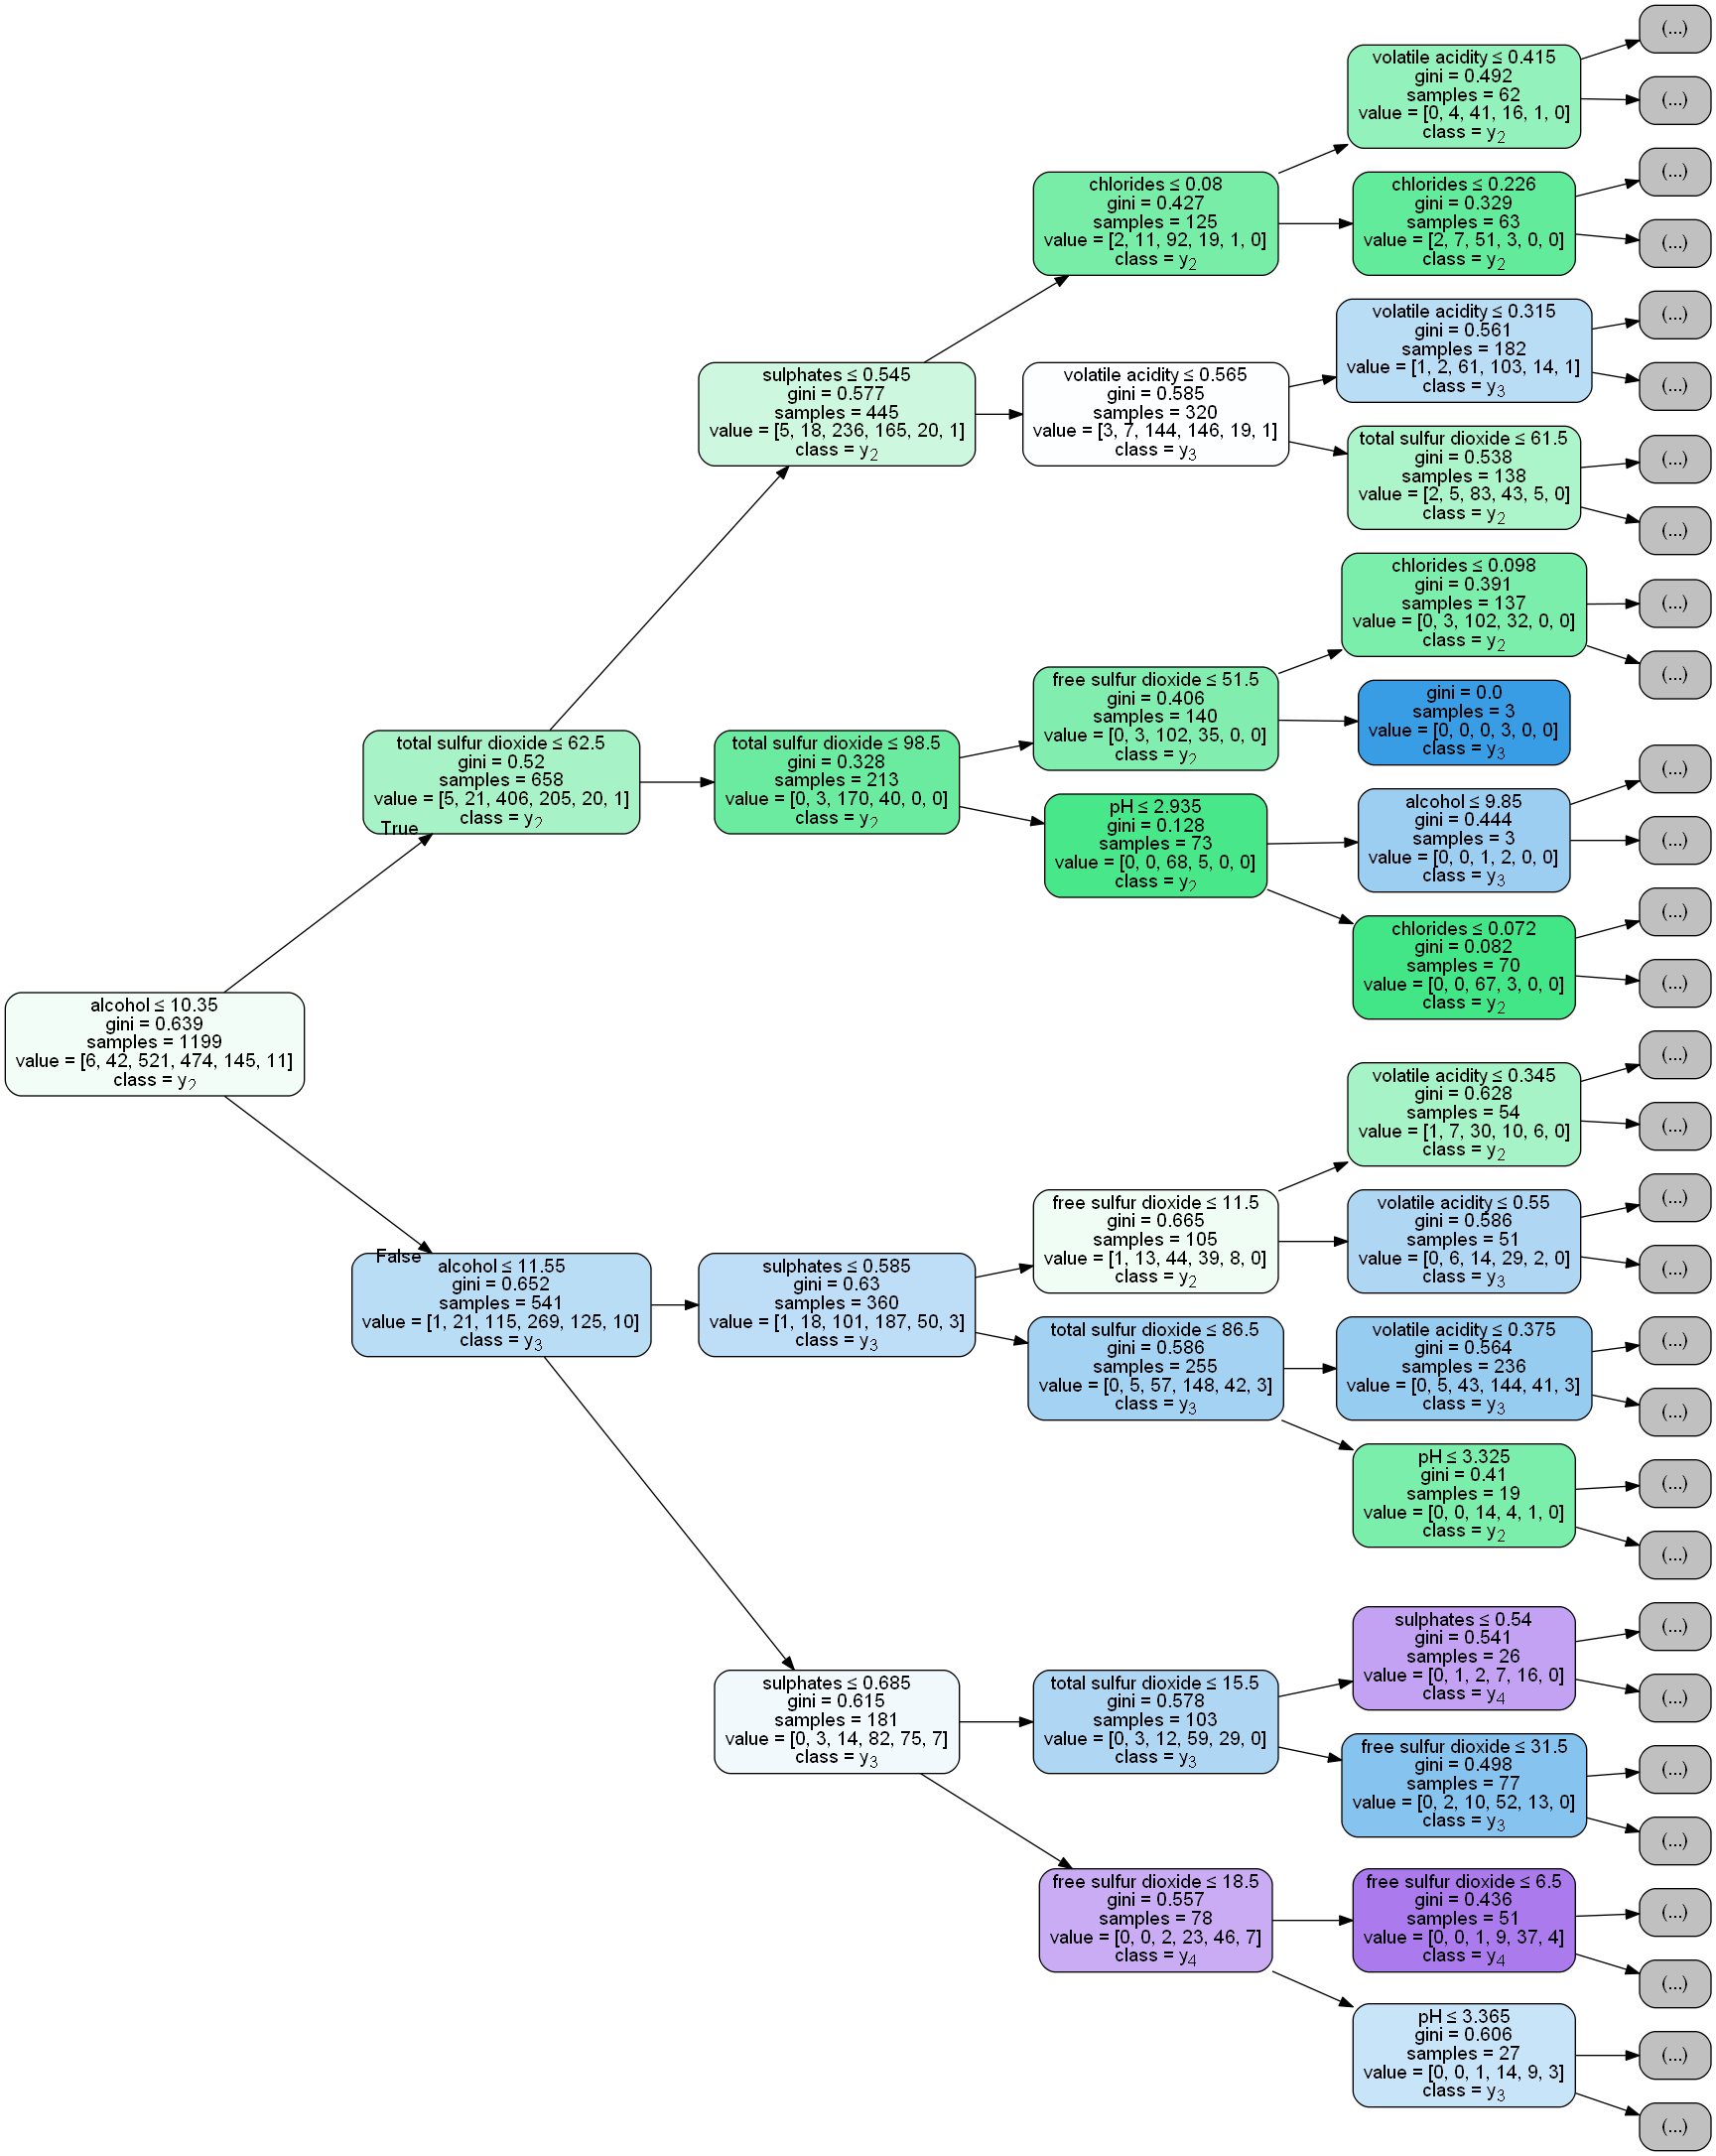

In [27]:
dot_data = StringIO()
export_graphviz(dt,out_file = dot_data,filled = True,rounded = True, 
                special_characters = True, feature_names = colnames[0:11],class_names=True,
               max_depth=4,rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('winetree4.png')
Image(graph.create_png())